# Flask 연습 및 실습 코드

## Flask 설치
로컬 환경에서는 flask만 설치해 주면 가능하지만, colab이라는 특수 환경에서는 flask-ngrok을 추가적으로 설치 해 주어야 합니다.

In [1]:
!pip install flask --quiet
!pip install flask-ngrok --quiet
print("Completed!")

Completed!


In [2]:
# ngrok website에서 linux 버전 ngrok 설치 - https://dashboard.ngrok.com/get-started/setup

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz

--2022-09-24 05:38:34--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.tgz
Resolving bin.equinox.io (bin.equinox.io)... 18.205.222.128, 54.237.133.81, 54.161.241.46, ...
Connecting to bin.equinox.io (bin.equinox.io)|18.205.222.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13770165 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.tgz’

ngrok-stable-linux- 100%[===================>]  13.13M  3.35MB/s    in 6.7s    

2022-09-24 05:38:41 (1.95 MB/s) - ‘ngrok-stable-linux-amd64.tgz’ saved [13770165/13770165]



In [3]:
# linux ngrok을 설치 후 압축을 풀어주는 과정

!tar -xvf /content/ngrok-stable-linux-amd64.tgz

ngrok


ngrok flask를 사용하기 위해서는 자신의 계정 생성이 필요합니다.

https://ngrok.com/

위 주소로 접속하여 계정 생성 후 자신의 Authtoken을 찾아줍니다.

In [4]:
# ngrok 홈페이지 계정 생성 후 자신의 Authtoken을 입력해 주어야 사용 가능

# !./ngrok authtoken 2DQJhcEWSPOoLv3Snvgigjpsv8l_brrdB6z5vmKpce77faDA
!./ngrok authtoken 2Esv8w22whjYE91p5YvcBtyNdKq_4nuor1sKynpk11JqT391q

Authtoken saved to configuration file: /root/.ngrok2/ngrok.yml


In [5]:
# import Flask from flask module
from flask import Flask

# import run_with_ngrok from flask_ngrok to run the app using ngrok
from flask_ngrok import run_with_ngrok

# Flask 시작하기
내가 만든 웹사이트 접속하기
### 장점

* 이전에 배웠던 HTML의 구조(\<!DOCTYPE html\> \<html\> \</html\>...)에 비해 쉽게 웹 사이트 구현 가능
* def home()과 같이 파이썬 문법을 사용 가능합니다.


In [6]:
app = Flask(__name__)        # 플라스크를 쓰겠다
run_with_ngrok(app)          # ngrok을 쓰겠다

@app.route('/')              # routing
def home():
     return f"<h1>Welcome to Flask World<h1/>"   # 훨씬 쉽게 구현 가능! - html의 형식 생략 가능
                                                 # <h1></h1> 태그: h1 ~ h6의 제목 태그 중 가장 큰 것

app.run()                    # 플라스크 실행

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://11ac-34-91-53-143.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 05:39:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 05:39:35] "GET /favicon.ico HTTP/1.1" 404 -


### <font color=blue>문제!</font>

* 위의 코드와 같은 기능을 하는 정석적인 HTML 문서를 써보세요. (ppt 참고)

In [7]:
html = '''
<!DOCTYPE html>
<html lang = 'ko'>
<head>
<meta charset = "UTF-8">
  <body>
    <h1>Welcome to Flask World!</h1>
  </body>
<head>
</html>
'''

## Routing. 플라스크의 굉장한 장점! 1

* 폴더의 트리 구조처럼, 하나의 URL을 하나의 HTML 파일로 구성한다.

In [9]:
app = Flask(__name__)
run_with_ngrok(app)  #colab에서는 localhost를 사용할 수 없기 때문에 ngrok을 사용하여 url주소를 받는 것임 ~.~

@app.route('/')                                        # root 주소 
def home():
     return f"<h1>This is your main homepage!</h1>"    # root 주소에 출력할 내용

@app.route('/create/')                                 # root 하위에 create 주소(폴더)
def create():
     return f"<h1>Welcome to create homepage!</h1>"

@app.route('/readid/')                                 # root 하위에 readid 주소
def read():
     return f"<h1>Welcome to readid homepage! If you want readid, change your id url</h1>"

@app.route('/readid/<id>/')                            # route에 <id>, 파이썬 쪽에 {id}를 통해서 변수를 받을 수 있다. - <>를 사용하여 변수를 받음
def readid(id):
     return f"<h1>Welcome to readid homepage! Hello {id}!</h1>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://5f4b-34-91-53-143.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 06:15:42] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 06:15:43] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 06:15:52] "GET /readid/승혜 HTTP/1.1" 308 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 06:15:53] "GET /readid/승혜/ HTTP/1.1" 200 -


python의 변수를 활용해서 입력된 변수에 맞게 서로 다른 페이지로 손쉽게 이동할 수 있도록 만듭니다.

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

@app.route('/')
def home():
     return f'''<!doctype html>
     <html>
      <body>
        <h1>Welcome to your homepage</h1>                          <!--<h1>~<h6>: 제목 태그-->
        <ol>                                                       <!-- <o1></o1>: ordered list -->
          <li><a href = "/read/1/">Click this part!</a></li>       <!-- <li>list의 각 원소들</li> -->
          <li><a href = "/read/2/">Now, click this part!</a></li>
          <li><a href = "/read/3/">New part!</a></li>              <!-- <a href="링크"></a>: 링크를 연결 -->
        </ol>
      '''

@app.route('/read/<id>/')
def readid(id):
     return f"<h1>This is main body contents! Hello {id}!</h1>"

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://b5fe-34-73-105-103.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:16:05] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:16:05] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:16:43] "GET /read/1/ HTTP/1.1" 200 -



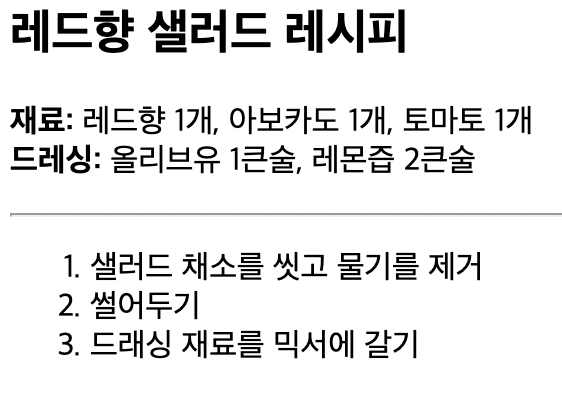

## <font color=blue>문제</font>
* 위와 같은 html 페이지를 "Flask 없이 html로" 만들어 보세요.
* html 파일을 만드는 방법: 메모장에 내용을 입력하고, 확장자를 html로 저장.


* 사용되는 태그: 
* \<h2\>\</h2\> (제목 태그)
* \<p\>\</p\> (문단 태그): 
    * \<p\>재료: 레드향 1개, 아보카도 1개, 토마토 1개
    드레싱: 올리브유 1큰술, 레몬즙 2큰술\</p\>
    * 위 내용을 한 문단에 넣으세요
* \<b\>\</b\> (글자 진하게)
* \<br\> \</br\> (줄바꿈)
* \<ol\>\</ol\> (ordered list)
* \<li\>\</li\> (list의 각 원소)
* \<hr\> (닫는 태그 없음. horizontal line을 생성)


### <font color=blue>위와 같은 html 파일을 단순히 눌러도 실행이 됩니다. 그런데 왜 flask를 쓸까요?</font>
* 답: inference 함수와 같은 파이썬 코드를 반영하기 힘들다!

*   항목 추가
*   항목 추가



## Python 문법 사용. Flask의 굉장한 장점! 2
파이썬의 속성인 list, dict를 이용해서도 각각에 필요한 HTML코드에 추가해 줄 수 있으며 이를 이용하여 코드를 단축시킬 수 있다.

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

clicks = [
    {'id':1, 'head':'Click this part!', 'body':'This is main body contents!1'},
    {'id':2, 'head':'Now, click this part!', 'body':'This is main body contents!2'},
    {'id':3, 'head':'New part!', 'body':'This is main body contents!3'}
]         # 파이썬 문법. 리스트 내부에 딕셔너리가 있는 구조 사용.

@app.route('/')
def home():
  liTags = ''
  for click in clicks:         # 파이썬 for 구문 사용
    liTags = liTags + f'<li><a href="/read/{click["id"]}">{click["head"]}</a></li>'
    # <li> </li>: list의 원소
    # {click["id"]}: 위의 딕셔너리 구조에서 'id' key의 value를 가져옴
    # <a href="링크"></a>: 하이퍼링크 연결 (다른 HTML로 이동)

  return f'''<!doctype html>
  <html>
      <body>
        <h1>Welcome to your homepage</h1>
        <ol>
          {liTags}      
        </ol>
  '''
# 위에서 정의한 변수 liTags가 3줄 위의 {liTags}에 들어간다.

@app.route('/read/<id>/')

# id에 해당하는 body를 출력하는 함수
# ex) /read/1/ 페이지 --> 'This is main body contents!1' 출력
# ex) /read/2/ 페이지 --> 'This is main body contents!2' 출력
# ex) /read/3/ 페이지 --> 'This is main body contents!3' 출력
def readid(id):
  num = 0
  body = ''
  while num < len(clicks):                                    
                                                            # 1번을 누른 경우: clicks[0], 즉 'id':1 부분 가져옴.
                                                                                                         
                                                            #len(clicks) == 3
    if str(clicks[num]['id']) == str(id):                   
                                                            # 변수 id의 값(str(id))은 def home()에 의해
                                                            # click["id"]에서 가져온다.

      body = body + f"<h1>{clicks[num]['body']}</h1>"       # 일치하는 click의 body 내용을 출력.
      break                                                 # break: 무조건 반복문(while)을 탈출
    num += 1
  return body

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://6b8a-34-125-123-232.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 00:39:58] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 00:39:58] "GET /favicon.ico HTTP/1.1" 404 -


### 위 코드에 있는 while 문이 너무 어려우니
* 값을 모르겠는 변수를 전부 print()해서 이해해 봅시다
* 어려운 코드를 만나면, 무조건 전부 다 print 해보세요!
* 함수의 논리가 잘 이해 안되면 그냥 넘어가도 됩니다. <font color=blue>중요한 건, Flask에 위와 같이 복잡한 파이썬 함수를 쓸 수 있다!</font>는 사실을 아는 것입니다.

In [ ]:
def readid(id):
  num = 0
  body = ''
  while num < len(clicks):

    print("\nwhile num < len(clicks)를 해결해 봅시다.")
    print(f'num의 값: {num}')
    print(f'len(clikcs)의 값 {len(clicks)}\n')
    print(" if str(clicks[num]['id']) == str(id):를 해결해 봅시다.")
    print(f'    clicks[num]["id"]의 값: {clicks[num]["id"]}')
    print(f'    id의 값: {id}')
    print(f'{id}와 {num+1}이 같은가요? (같으면 while 문의 break에 의해 반복문 종료)')

    if str(clicks[num]['id']) == str(id):       
      body = body + f"<h1>{clicks[num]['body']}</h1>"

      print("-------------반복문 종료------------")
      break
      
    else:
      print("-------------반복문 종료 안됨---------")
    num += 1
  return body

print(readid(1)+'\n')
print(readid(2)+'\n')
print(readid(3)+'\n')
print(readid(4)+'\n')


while num < len(clicks)를 해결해 봅시다.
num의 값: 0
len(clikcs)의 값 3

 if str(clicks[num]['id']) == str(id):를 해결해 봅시다.
    clicks[num]["id"]의 값: 1
    id의 값: 1
1와 1이 같은가요? (같으면 while 문의 break에 의해 반복문 종료)
-------------반복문 종료------------
<h1>This is main body contents!1</h1>


while num < len(clicks)를 해결해 봅시다.
num의 값: 0
len(clikcs)의 값 3

 if str(clicks[num]['id']) == str(id):를 해결해 봅시다.
    clicks[num]["id"]의 값: 1
    id의 값: 2
2와 1이 같은가요? (같으면 while 문의 break에 의해 반복문 종료)
-------------반복문 종료 안됨---------

while num < len(clicks)를 해결해 봅시다.
num의 값: 1
len(clikcs)의 값 3

 if str(clicks[num]['id']) == str(id):를 해결해 봅시다.
    clicks[num]["id"]의 값: 2
    id의 값: 2
2와 2이 같은가요? (같으면 while 문의 break에 의해 반복문 종료)
-------------반복문 종료------------
<h1>This is main body contents!2</h1>


while num < len(clicks)를 해결해 봅시다.
num의 값: 0
len(clikcs)의 값 3

 if str(clicks[num]['id']) == str(id):를 해결해 봅시다.
    clicks[num]["id"]의 값: 1
    id의 값: 3
3와 1이 같은가요? (같으면 while 문의 break에 의해 반복문 종료)
-------------반복문 종료 안됨---------

while

파이썬에서 함수를 생성하고 함수를 사용하듯 Template 함수를 만들어 HTML의 기본 형식을 지정하고 사용할 수 있다. 

* <font color=blue>Template 함수: return "html 형식"을 공장처럼 찍어내는 함수</font> 이런 것도 쓰면 편하겠죠?

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

clicks = [
    {'id':1, 'head':'Click this part!', 'body':'This is main body contents!1'},
    {'id':2, 'head':'Now, click this part!', 'body':'This is main body contents!2'},
    {'id':3, 'head':'New part!', 'body':'This is main body contents!3'}
]

def template(contents, content):           #template 함수 {contents}, {content}에 무슨 값이 들어가는지 살펴보자.
  return f'''<!doctype html>
  <html>
    <body>
      <h1>Welcome to your homepage</h1>
      <ol>
        {contents}
      </ol>
      {content}
    </body>
  </html>
  '''

def getContents():
  liTags = ''
  for click in clicks:
    liTags = liTags + f'<li><a href="/read/{click["id"]}">{click["head"]}</a></li>'
  return liTags

@app.route('/')
def home():
  return template(getContents(), '<h2>Welcome</h2>Hello, Users!')   # root는 항상 Welcome~ 내용을 출력하고 있다. 
                                                                    # getContents()함수의 값에 따라서 

@app.route('/read/<id>/')
def readid(id):           # 이전에 썼던 함수: /read/<id>/ 페이지에 <body> 내용 출력
  num = 0
  body = ''
  while num < len(clicks):
    if str(clicks[num]['id']) == str(id):
      body = body + f"<h2>{clicks[num]['body']}</h2>"
      break
    num += 1
  return template(getContents(), body)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://c305-34-73-105-103.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:52] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:52] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:54] "GET /read/1 HTTP/1.1" 308 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:55] "GET /read/1/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:57] "GET /read/2 HTTP/1.1" 308 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:58] "GET /read/2/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:59] "GET /read/3 HTTP/1.1" 308 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:40:59] "GET /read/3/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:41:00] "GET /read/1/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:43:08] "GET /read/1/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:43:10] "GET /read/2/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Sep/2022 19:43:37] "GET /read/2/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [23/Se

In [ ]:
from flask import request

### <form> </form> 태그
* 폼을 형성. 폼이란 사용자의 다양한 input을 받는 형식이다. 
  * ex) 네이버 검색창에서 text input 받기
  * 어떤 input인지는 <form></form> 태그가 아닌 \<input type=""\>에 나와 있다.

* \<input name="title"\>
  * 여기의 title은 나중에 정보를 받을 때 어떤 정보인지 식별하기 위한 이름(name)으로 사용

### <font color=blue>문제!</font>
* 간단한 폼 만들어보기
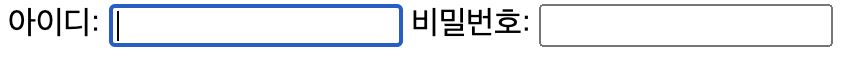






* 사용되는 태그:
* \<form\>\</form\>   (폼의 시작과 끝)
* \<input type="text"\>   (아이디의 input 태그)
* 위의 \<input type="text"\> 의 결과물은 <input type="text">다.
* \<input type="password"\>  (비밀번호의 input 태그)

## Get 과 Post
flask내에 있는 request를 불러와 전송 방식을 설정해 줄 수 있다


### <font color=blue>문제!</font>

* 아무리 뭘 눌러봐도 def create()함수를 쓸 방법이 안 보일 겁니다! 어떻게 def create()함수를 쓸 수 있을까요?

In [ ]:
app = Flask(__name__)
run_with_ngrok(app)

clicks = [
    {'id':1, 'head':'Click this part!', 'body':'This is main body contents!1'},
    {'id':2, 'head':'Now, click this part!', 'body':'This is main body contents!2'},
    {'id':3, 'head':'New part!', 'body':'This is main body contents!3'}
]

def template(contents, content):
  return f'''<!doctype html>
  <html>
    <body>  
      <h1>Welcome to your homepage</h1>
      <ol>
        {contents}
      </ol>
      {content}
    </body>
  </html>
  '''

def getContents():
  liTags = ''
  for click in clicks:
    liTags = liTags + f'<li><a href="/read/{click["id"]}">{click["head"]}</a></li>'
  return liTags

@app.route('/')
def home():
  return template(getContents(), '<h2>Welcome</h2>Hello, Users!')

@app.route('/read/<id>/')
def readid(id):
  num = 0
  body = ''
  while num < len(clicks):
    if str(clicks[num]['id']) == str(id):
      body = body + f"<h2>{clicks[num]['body']}</h2>"
      break
    num += 1
  return template(getContents(), body)

@app.route('/create/', methods=['GET', 'POST'])
def create():
  if request.method == "GET":     
      # 아래 content 내부의 method를 GET/POST로 바꿔봅시다.
      # 폼 형식 사용: input을 받는다. 어떤 input???: <input type="">에 나와있다.
      # <input name="title" : 나중에 GET 정보를 보내는 name(이름)
    content = '''
      <form action="/create/" method="GET"> 
        <p><input type="text" name="title" placeholder="title"></p>
        <p><textarea name="body" placeholder="body"></textarea></p>
        <p><input type="submit"></p>
      </form>
    '''
    return template(getContents(), content)
  elif request.method == "POST":
    return 'Hello Post'

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://bd2f-34-125-123-232.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 03:06:35] "GET / HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 03:06:36] "GET /favicon.ico HTTP/1.1" 404 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 03:06:37] "GET /read/1 HTTP/1.1" 308 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 03:06:37] "GET /read/1/ HTTP/1.1" 200 -
INFO:werkzeug:127.0.0.1 - - [24/Sep/2022 03:06:43] "GET /create HTTP/1.1" 308 -
ERROR:__main__:Exception on /create/ [GET]
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 2447, in wsgi_app
    response = self.full_dispatch_request()
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1952, in full_dispatch_request
    rv = self.handle_user_exception(e)
  File "/usr/local/lib/python3.7/dist-packages/flask/app.py", line 1821, in handle_user_exception
    reraise(exc_type, exc_value, tb)
  File "/usr/local/lib/python3.7/dist-packages/flask/_compat.py", line 39, in reraise
    raise value
  File "/usr/local/

# HTML과 CSS, JS를 이용한 예시

In [ ]:
from flask import Flask, url_for, redirect, render_template, request
from flask_ngrok import run_with_ngrok
import os

In [ ]:
TEMPLATE_FOLDER = '/content'
STATIC_FOLDER = '/content/static'
app = Flask(__name__, template_folder=TEMPLATE_FOLDER, static_folder = STATIC_FOLDER)
run_with_ngrok(app)   

@app.route('/')
def index():
    return render_template('index.html', image_path='img/tmp_image.jpg', css_path='css/index.css', js_path='index.js')

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
